<a href="https://colab.research.google.com/github/rukshiniRasa/Datacamp/blob/main/Datacamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datacamp

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator #image generator label data based on the dir the image in contained in
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import load_img, img_to_array 
from tensorflow.keras.models import Model
from keras.preprocessing import image
from google.colab import files
import os
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_files = '/content/drive/MyDrive/Datacamp'

In [ ]:
train_normal_dir = os.path.join('/content//drive/My Drive/Datacamp/train/NORMAL')
train_pneumonia_dir = os.path.join('/content/drive/My Drive/Datacamp/train/PNEUMONIA')
test_normal_dir = os.path.join('/content/drive/My Drive/Datacamp/test/NORMAL')
test_pneumonia_dir = os.path.join('/content/drive/My Drive/Datacamp/test/PNEUMONIA')

train_normal_names = os.listdir(train_normal_dir)
train_pneumonia_names = os.listdir(train_pneumonia_dir)
test_normal_names = os.listdir(test_normal_dir)
test_pneumonia_names = os.listdir(test_pneumonia_dir)

# Nouvelle section

In [ ]:
print('total train normal chest xray: ', len(os.listdir(train_normal_dir)))
print('total train pneumonia chest xray:', len(os.listdir(train_pneumonia_dir)))
print('total test normal chest xray: ', len(os.listdir(test_normal_dir)))
print('total test pneumonia chest xray: ', len(os.listdir(test_pneumonia_dir)))

total train normal chest xray:  1349
total train pneumonia chest xray: 3883
total test normal chest xray:  234
total test pneumonia chest xray:  390


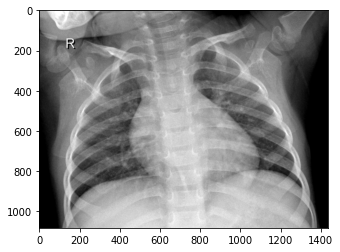

In [ ]:
train_normal_names[1]
img = mpimg.imread(os.path.join(train_normal_dir,'NORMAL-32326-0001.jpeg'))
plt.imshow(img, cmap = 'gray')

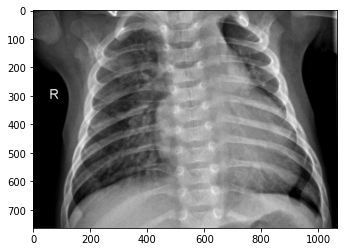

In [ ]:
train_pneumonia_names[1]
img = mpimg.imread(os.path.join(train_pneumonia_dir, 'BACTERIA-7422-0001.jpeg'))
plt.imshow(img, cmap = 'gray')

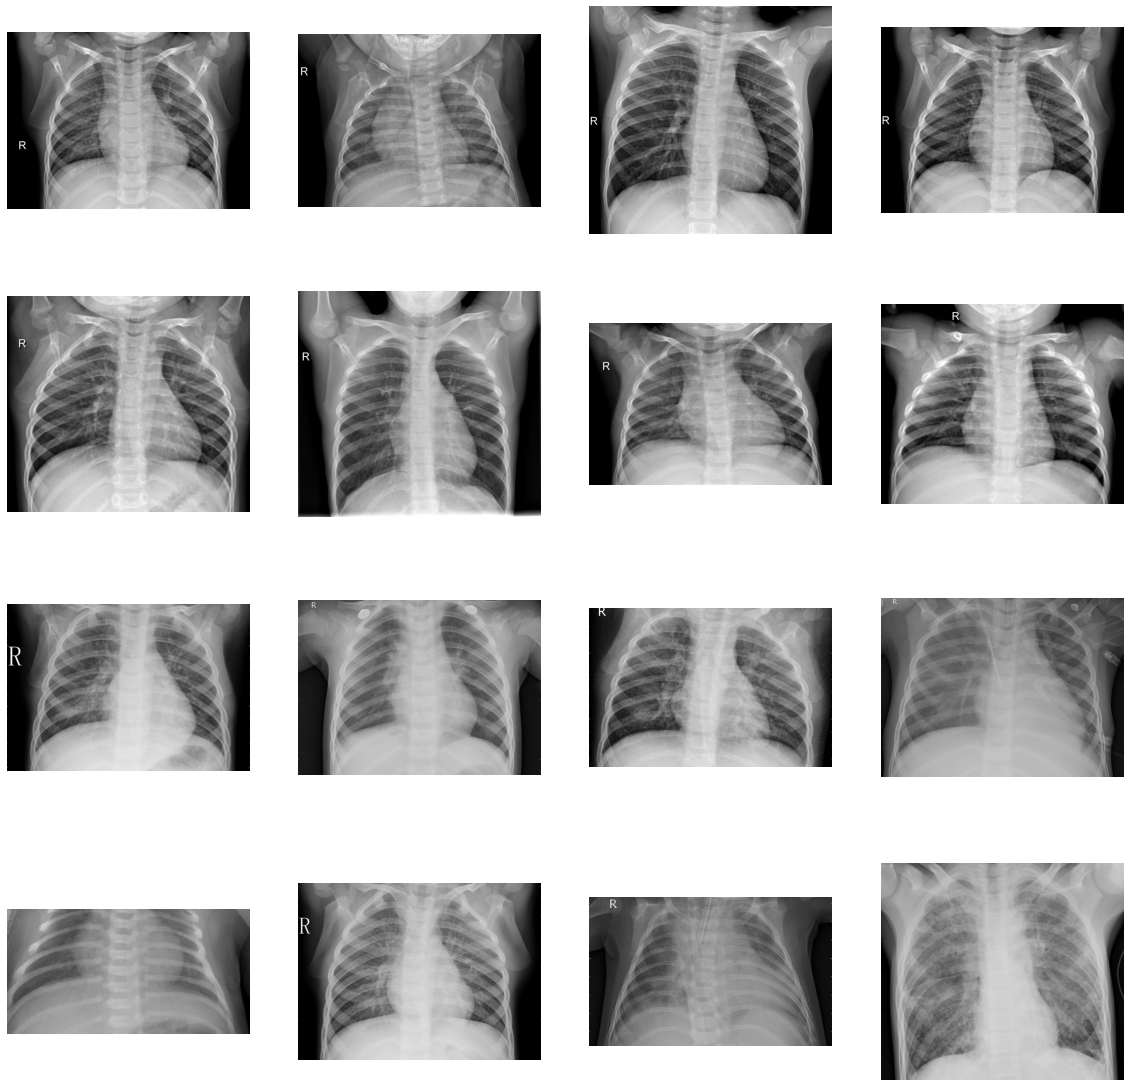

In [ ]:
# parameters for graph
nrows = 4
ncols = 4


fig = plt.gcf() #get the current image
fig.set_size_inches(20, 20) #image size

next_normal_pix = [os.path.join(train_normal_dir, fname) 
                    for fname in train_normal_names[0:8]]
next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname)
                      for fname in train_pneumonia_names[0:8]]

for i, img_path in enumerate(next_normal_pix + next_pneumonia_pix):
  # set up subplot
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = 'gray')

plt.show() 

In [ ]:
model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('normal') clas and 1 for ('pneumonia') class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Datacamp/train',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Datacamp/test',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
10/10 [==============================] - 968s 100s/step - loss: 1.0045 - accuracy: 0.6954 - val_loss: 0.7483 - val_accuracy: 0.6250
Epoch 2/10
10/10 [==============================] - 418s 42s/step - loss: 0.5722 - accuracy: 0.7508 - val_loss: 3.6863 - val_accuracy: 0.3750
Epoch 3/10
10/10 [==============================] - 315s 32s/step - loss: 0.9247 - accuracy: 0.6977 - val_loss: 0.5211 - val_accuracy: 0.7452
Epoch 4/10
10/10 [==============================] - 249s 24s/step - loss: 0.4291 - accuracy: 0.8086 - val_loss: 0.5284 - val_accuracy: 0.7580
Epoch 5/10
10/10 [==============================] - 189s 20s/step - loss: 0.2979 - accuracy: 0.8877 - val_loss: 0.5921 - val_accuracy: 0.7692
Epoch 6/10
10/10 [==============================] - 135s 13s/step - loss: 0.3453 - accuracy: 0.8608 - val_loss: 0.4616 - val_accuracy: 0.8173
Epoch 7/10
10/10 [==============================] - 105s 11s/step - loss: 0.2768 - accuracy: 0.8859 - val_loss: 0.5321 - val_accuracy: 0.8061
Epoch

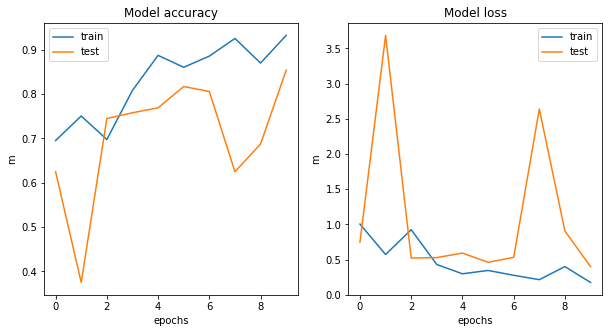

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

metric = ['accuracy', 'loss']
for i, m in enumerate(metric):
  ax[i].plot(history.history[m])
  ax[i].plot(history.history['val_'+ m])
  ax[i].set_title('Model {}'.format(m))
  ax[i].set_xlabel('epochs')
  ax[i].set_ylabel('m')
  ax[i].legend(['train', 'test'])

In [ ]:
# load new unseen dataset
test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Datacamp/test',
    target_size = (300, 300),
    batch_size = 5, 
    class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_generator, 16)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


loss rate at evaluation data : 0.206625297665596
accuracy rate at evaluation data : 0.875


Saving BACTERIA-1514320-0002.jpeg to BACTERIA-1514320-0002.jpeg
1/1 [==============================] - 0s 18ms/step
[1.]
BACTERIA-1514320-0002.jpeg is pneumonia


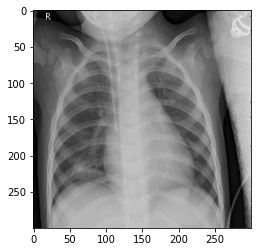

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = keras.utils.load_img(path, target_size=(300,300))
  x = keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0]> 0.5:
    print(fn + ' is pneumonia')
    plt.imshow(img)
  else:
    print(fn + 'is normal')
    plt.imshow(img)